# NHS Emergency Readmissions Analysis (England, 2013–2024)

## Dataset Information
- Source: NHS Digital – Emergency Readmissions Compendium (https://digital.nhs.uk/data-and-information/publications/statistical/compendium-emergency-readmissions/current/emergency-readmissions-to-hospital-within-30-days-of-discharge)
- File Name: Emergency readmission.csv
- Format: CSV
- Size: 141,713 rows × 19 columns
- Period Covered: 2013/14 to 2023/24
- Breakdowns Included: Age, Sex, Diagnosis, Region, Provider, Deprivation


## Project Summary
This project analyses over 141,000 NHS emergency readmission records to identify patterns by age group, hospital performance, and time period. The aim is to uncover drivers of readmission risk, assess the impact of COVID‑19, and provide actionable recommendations for reducing avoidable readmissions.

- Data Profiling & Cleaning: Verified dataset schema, removed ambiguous "All" age group from subgroup visuals, standardised formats, and flagged statistical outliers while retaining them per NHS methodology.

- Univariate & Bivariate Analysis: Explored readmission rate distributions, age group comparisons, and performance label breakdowns to identify high‑risk segments.

- Trend Analysis: Charted yearly discharge and readmission patterns, highlighting COVID‑19’s impact on volumes and rates.

- Outlier Detection: Applied the IQR method to flag unusually high readmission rates, concentrating in older age groups and lower‑performing providers.

- Correlation & Efficiency Assessment: Measured relationships between discharge efficiency and readmission rates, confirming strong links between operational performance and patient outcomes.

## Problem Statement
High readmission rates can indicate gaps in patient care, discharge planning, or follow‑up. Understanding these patterns is critical for improving patient outcomes and NHS efficiency.

## Objectives

- Analyse readmission rates by age group and performance label
- Identify temporal trends and COVID‑19 impacts
- Flag and interpret statistical outliers
- Provide evidence‑based recommendations

## Phase 1: Data loading and initial overview

In [1]:
# Setup & Imports

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warning handling
import warnings
warnings.filterwarnings("ignore")

# --- Global Visualization Configuration ---

# Show plots inline in the notebook
%matplotlib inline

# Seaborn style: clean white background with light gridlines
sns.set_style("whitegrid")

# Default figure size for all plots
plt.rcParams['figure.figsize'] = (10, 6)

# Set a consistent font size for readability
plt.rcParams['font.size'] = 12

# Define fixed color palettes for consistency
age_palette = {
    "<16": "#4C78A8",       # Blue
    "16-74": "#72B7B2",     # Teal
    "75+": "#E45756",       # Red
    "16+": "#F58518"        # Orange
}

# Apply Seaborn's default color cycle for other plots
sns.set_palette("Set2")

In [2]:
# Load Dataset
df = pd.read_csv("Emergency readmission.csv")
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (141713, 19)


In [3]:
# Get an overview of column names, data types, and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141713 entries, 0 to 141712
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Year                           141713 non-null  object 
 1   Period of coverage             141713 non-null  object 
 2   Breakdown                      141713 non-null  object 
 3   Level                          141713 non-null  object 
 4   Level description              141713 non-null  object 
 5   Age Breakdown                  141713 non-null  object 
 6   Sex Breakdown                  141713 non-null  object 
 7   Diagnosis/Procedure Breakdown  141713 non-null  object 
 8   Method                         141713 non-null  object 
 9   Indicator value                141708 non-null  float64
 10  Lower CI (95%)                 141708 non-null  float64
 11  Upper CI (95%)                 141708 non-null  float64
 12  Lower CI (99.8%)              

In [4]:
# Generate basic descriptive statistics for numeric columns
df.describe()

,Indicator value,Lower CI (95%),Upper CI (95%),Lower CI (99.8%),Upper CI (99.8%),Expected
count,141708.000000,141708.000000,141708.000000,141708.000000,141708.000000,141708.000000
mean,13.417926,11.220290,18.836480,10.465043,22.711126,3090.780714
std,8.824483,4.397462,48.865381,4.625845,80.551312,15556.943937
min,0.800000,0.000000,3.400000,0.000000,5.000000,0.000000
25%,11.100000,9.400000,12.600000,8.500000,13.200000,181.575000
50%,12.900000,11.800000,14.300000,11.300000,15.000000,730.250000
75%,15.100000,13.800000,17.600000,13.400000,19.000000,1932.300000
max,921.400000,179.200000,5758.400000,88.600000,9514.900000,939199.000000


In [5]:
# Check for missing values in each column
df.isnull().sum()

Year                                  0
Period of coverage                    0
Breakdown                             0
Level                                 0
Level description                     0
Age Breakdown                         0
Sex Breakdown                         0
Diagnosis/Procedure Breakdown         0
Method                                0
Indicator value                       5
Lower CI (95%)                        5
Upper CI (95%)                        5
Lower CI (99.8%)                      5
Upper CI (99.8%)                      5
Numerator                             0
Denominator                           0
Expected                              5
Banding                             165
Warnings                         127446
dtype: int64

## Phase 2: Data Pre-processing & Cleaning
Prepare the raw dataset for analysis by cleaning column names, handling missing values, converting data types, and filtering irrelevant rows. This phase ensures the data is structured, reliable, and analysis-ready.


In [6]:
# Standardise column names for uniform formatting
#    - Remove any leading/trailing spaces
#    - Convert all characters to lowercase
#    - Replace spaces with underscores for easier referencing in code
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Rename columns to more descriptive, human‑readable names
#    - This improves clarity for analysis and visualisation
#    - Keys are the current column names, values are the new names
df.rename(columns={
    'year': 'fiscal_year(April to March)',        # Fiscal year in NHS reporting format
    'period_of_coverage': 'period',               # Period covered by the data
    'breakdown': 'breakdown_type',                 # Type of breakdown (e.g., age, sex, diagnosis)
    'level': 'level_code',                         # Code representing the reporting level
    'level_description': 'level_name',             # Descriptive name for the reporting level
    'age_breakdown': 'age_group',                  # Age group category
    'sex_breakdown': 'sex',                        # Sex category
    'diagnosis/procedure_breakdown': 'diagnosis_category',  # Diagnosis or procedure category
    'method': 'standardisation_method',            # Method used for standardisation
    'indicator_value': 'readmission_rate',         # Readmission rate (%)
    'lower_ci_(95%)': 'ci_lower_95',               # Lower bound of 95% confidence interval
    'upper_ci_(95%)': 'ci_upper_95',               # Upper bound of 95% confidence interval
    'lower_ci_(99.8%)': 'ci_lower_998',            # Lower bound of 99.8% confidence interval
    'upper_ci_(99.8%)': 'ci_upper_998',            # Upper bound of 99.8% confidence interval
    'numerator': 'readmissions',                   # Number of readmissions (numerator)
    'denominator': 'discharges',                   # Number of discharges (denominator)
    'expected': 'expected_readmissions',           # Expected number of readmissions
    'banding': 'performance_band',                 # NHS performance band classification
    'warnings': 'data_quality_flag'                # Data quality warning flag
}, inplace=True)  # Apply changes directly to the DataFrame

# Preview the first 5 rows to confirm changes
df.head()

,fiscal_year(April to March),period,breakdown_type,level_code,level_name,age_group,sex,diagnosis_category,standardisation_method,readmission_rate,ci_lower_95,ci_upper_95,ci_lower_998,ci_upper_998,readmissions,discharges,expected_readmissions,performance_band,data_quality_flag
0,2013/14,01/04/2013 to 31/03/2014,England,England,England,All,Persons,All,Snapshot,12.4,12.3,12.4,12.3,12.4,728341,5896153,728341.0,NaN,NaN
1,2013/14,01/04/2013 to 31/03/2014,England,England,England,All,Male,All,Snapshot,12.7,12.7,12.7,12.6,12.8,340546,2680959,340546.0,NaN,NaN
2,2013/14,01/04/2013 to 31/03/2014,England,England,England,All,Female,All,Snapshot,12.1,12.0,12.1,12.0,12.1,387795,3215194,387795.0,NaN,NaN
3,2014/15,01/04/2014 to 31/03/2015,England,England,England,All,Female,All,Snapshot,12.5,12.4,12.5,12.4,12.5,409086,3278844,409086.0,NaN,NaN
4,2014/15,01/04/2014 to 31/03/2015,England,England,England,All,Male,All,Snapshot,12.9,12.9,13.0,12.9,13.0,354617,2742184,354617.0,NaN,NaN


In [7]:
# Remove columns that are not needed for the analysis or visualisation.
# This helps reduce dataset size, improve clarity, and optimise performance.

df.drop(
    columns=[
        'period',               # Duplicate information already captured in 'fiscal_year(April to March)'
        'diagnosis_category',   # Contains only "All" (one unique value) — no analytical value
        'ci_lower_95',          # Lower bound of 95% CI — statistical uncertainty not required for this analysis
        'ci_upper_95',          # Upper bound of 95% CI — same reason as above
        'ci_lower_998',         # Lower bound of 99.8% CI — not needed for current scope
        'ci_upper_998',         # Upper bound of 99.8% CI — not needed for current scope
        'standardisation_method', # Only contains "Annual"/"Snapshot" — no variation to analyse
        'data_quality_flag'     # Warnings column — not useful for visualisation or summary metrics
    ],
    inplace=True                # Apply changes directly to the DataFrame without creating a copy
)
# Preview the first 5 rows to confirm changes
df.head()

,fiscal_year(April to March),breakdown_type,level_code,level_name,age_group,sex,readmission_rate,readmissions,discharges,expected_readmissions,performance_band
0,2013/14,England,England,England,All,Persons,12.4,728341,5896153,728341.0,NaN
1,2013/14,England,England,England,All,Male,12.7,340546,2680959,340546.0,NaN
2,2013/14,England,England,England,All,Female,12.1,387795,3215194,387795.0,NaN
3,2014/15,England,England,England,All,Female,12.5,409086,3278844,409086.0,NaN
4,2014/15,England,England,England,All,Male,12.9,354617,2742184,354617.0,NaN


### Handling missing values

In [8]:
# Evaluvating missing values
df.isna().sum()

fiscal_year(April to March)      0
breakdown_type                   0
level_code                       0
level_name                       0
age_group                        0
sex                              0
readmission_rate                 5
readmissions                     0
discharges                       0
expected_readmissions            5
performance_band               165
dtype: int64

In [9]:
# Convert 'readmissions' and 'discharges' columns to numeric
#    - Coerce any non-numeric values (e.g., "*") into NaN so they can be handled consistently.
df["readmissions"] = pd.to_numeric(df["readmissions"], errors="coerce")
df["discharges"] = pd.to_numeric(df["discharges"], errors="coerce")

# Drop rows missing critical numeric values
#    - According to the NHS indicator specification, missing values here are due to
#      "suppression of small numbers" (denoted by "*") for confidentiality.
#    - These rows cannot be used in calculations, so they are safe to remove.
df = df.dropna(subset=["readmissions", "discharges"])

# Recalculate 'readmission_rate'
#    - This ensures the column is complete and consistent with the latest numeric values.
#    - Formula: (readmissions ÷ discharges) * 100, rounded to 1 decimal place.
df["readmission_rate"] = (df["readmissions"] / df["discharges"] * 100).round(1)

# Fill missing 'expected_readmissions' values
#    - Replace NaN values with the median of the column to avoid skewing the data.
df["expected_readmissions"] = df["expected_readmissions"].fillna(
    df["expected_readmissions"].median()
)

# Fill missing 'performance_band' values
#    - Replace NaN with the string "Unknown" to keep the category explicit in analysis.
df["performance_band"] = df["performance_band"].fillna("Unknown")

# Final check for remaining missing values
#    - Print a summary of NaN counts for each column to confirm cleaning results.
print("Remaining missing values:")
print(df.isna().sum())

Remaining missing values:
fiscal_year(April to March)    0
breakdown_type                 0
level_code                     0
level_name                     0
age_group                      0
sex                            0
readmission_rate               0
readmissions                   0
discharges                     0
expected_readmissions          0
performance_band               0
dtype: int64


### Correcting data types

In [10]:
# Assessing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128309 entries, 0 to 141712
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fiscal_year(April to March)  128309 non-null  object 
 1   breakdown_type               128309 non-null  object 
 2   level_code                   128309 non-null  object 
 3   level_name                   128309 non-null  object 
 4   age_group                    128309 non-null  object 
 5   sex                          128309 non-null  object 
 6   readmission_rate             128309 non-null  float64
 7   readmissions                 128309 non-null  float64
 8   discharges                   128309 non-null  float64
 9   expected_readmissions        128309 non-null  float64
 10  performance_band             128309 non-null  object 
dtypes: float64(4), object(7)
memory usage: 11.7+ MB


In [11]:
# Convert 'fiscal_year(April to March)' to a proper YYYY integer format
#    - NHS fiscal years are stored as strings like "2013/14" or "2019/20".
#    - We extract the first 4 characters (start year) and convert them to integers.
#    - This allows proper chronological sorting and numeric comparisons.
df["fiscal_year(April to March)"] = (
    df["fiscal_year(April to March)"].str[:4].astype(int)
)

# 2. Clean and convert 'readmissions' to numeric
#    - Convert values to string first to ensure string operations work.
#    - Remove any commas (e.g., "1,234" → "1234") for thousands separators.
#    - Strip any leading/trailing spaces.
#    - Convert to numeric, coercing invalid entries (e.g., "*") to NaN.
df["readmissions"] = pd.to_numeric(
    df["readmissions"].astype(str).str.replace(",", "").str.strip(),
    errors="coerce"
)

# 3. Clean and convert 'discharges' to numeric
#    - Same cleaning steps as 'readmissions' for consistency.
df["discharges"] = pd.to_numeric(
    df["discharges"].astype(str).str.replace(",", "").str.strip(),
    errors="coerce"
)

# 4. Inspect the DataFrame structure after conversions
#    - This confirms that the data types are correct and the changes applied successfully.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128309 entries, 0 to 141712
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fiscal_year(April to March)  128309 non-null  int32  
 1   breakdown_type               128309 non-null  object 
 2   level_code                   128309 non-null  object 
 3   level_name                   128309 non-null  object 
 4   age_group                    128309 non-null  object 
 5   sex                          128309 non-null  object 
 6   readmission_rate             128309 non-null  float64
 7   readmissions                 128309 non-null  float64
 8   discharges                   128309 non-null  float64
 9   expected_readmissions        128309 non-null  float64
 10  performance_band             128309 non-null  object 
dtypes: float64(4), int32(1), object(6)
memory usage: 11.3+ MB


In [12]:
# Define a custom, logical order for the 'age_group' categories
#    - By default, Pandas/Seaborn will sort categories alphabetically, which is not ideal for age ranges.
#    - This list specifies the intended order from youngest to oldest, plus the 'All' aggregate at the end.
age_order = ["<16", "16-74", "75+", "16+", "All"]

# Convert the 'age_group' column to a Pandas Categorical type with the specified order
#    - 'categories=age_order' ensures only these categories are recognised and plotted in this sequence.
#    - 'ordered=True' tells Pandas that the order matters for sorting and plotting.
df["age_group"] = pd.Categorical(
    df["age_group"], 
    categories=age_order, 
    ordered=True
)

#### Note:
Age groups `16+`, `16–74`, and `75+` overlap. 
Use `16–74` and `75+` for stratified analysis. 
Avoid combining `16+` with these unless explicitly aggregating.

### Handling duplicates

In [13]:
# Check total number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


### Filtering Data

In [14]:
# Remove rows where 'age_group' is "All"
#    - The "All" category is an aggregate across all ages and does not provide subgroup insight.
#    - Keeping it would distort age-based comparisons, so we filter it out.
df = df[df["age_group"] != "All"]

# Clean up the category metadata for 'age_group'
#    - After removing "All" from the data, it may still exist in the category list (if 'age_group' is categorical).
#    - This step removes unused categories from the metadata so plots and summaries only show relevant groups.
df["age_group"] = df["age_group"].cat.remove_unused_categories()

# Remove rows with invalid or unhelpful performance band values
#    - "Err!" indicates an error in the source data.
#    - "Unknown" means the performance band was not assigned, which is not useful for performance analysis.
#    - We filter out both to ensure only valid, interpretable categories remain.
df = df[
    (df["performance_band"] != "Err!") &
    (df["performance_band"] != "Unknown")
]

### Creating derived columns

In [15]:
# 1. Define a mapping from performance band codes to descriptive labels
#    - NHS datasets often use short codes (B1, B5, W, A5, A1, Unknown) for performance categories.
#    - This dictionary maps each code to a full, human-readable description.
band_map = {
    "B1": "Significantly Better (99.8% Confidence)",   # Top performance category
    "B5": "Better Than Average (95% Confidence)",      # Above-average performance
    "W":  "Within Expected Range",                     # Meets expected performance
    "A5": "Worse Than Average (95% Confidence)",       # Below-average performance
    "A1": "Significantly Worse (99.8% Confidence)",    # Lowest performance category
    "Unknown": "Not Classified / Insufficient Data"    # No classification available
}

# Create a new column 'performance_label' with descriptive names
#    - Use list comprehension to map each 'performance_band' code to its description.
df["performance_label"] = [band_map[band] for band in df["performance_band"]]

# Remove rows where performance label is "Not Classified / Insufficient Data"
#    - These rows lack meaningful classification and would add noise to performance analysis.
df = df[df["performance_label"] != "Not Classified / Insufficient Data"]

# 2. Calculate the difference between actual and expected readmissions
#    - 'readmission_diff' = actual readmissions - expected readmissions.
#    - Positive values indicate more readmissions than expected (potential underperformance).
#    - Negative values indicate fewer readmissions than expected (potential overperformance).
df["readmission_diff"] = df["readmissions"] - df["expected_readmissions"]

# 3. Calculate the discharge-to-readmission ratio
#    - 'discharge_per_readmission' = discharges ÷ readmissions.
#    - This metric highlights efficiency or patient turnover relative to readmissions.
#    - Rounded to 2 decimal places for readability.
df["discharge_per_readmission"] = (df["discharges"] / df["readmissions"]).round(2)

# Preview the first 5 rows to confirm the new columns are created correctly
df.head()


,fiscal_year(April to March),breakdown_type,level_code,level_name,age_group,sex,readmission_rate,readmissions,discharges,expected_readmissions,performance_band,performance_label,readmission_diff,discharge_per_readmission
19583,2013,Deprivation quintile,0,No IMD lookup,<16,Persons,5.5,590.0,10670.0,1103.8,B1,Significantly Better (99.8% Confidence),-513.8,18.08
19584,2013,Deprivation quintile,1,IMD Group 1 (Most Deprived),<16,Persons,11.9,30550.0,256495.0,29425.2,A1,Significantly Worse (99.8% Confidence),1124.8,8.40
19585,2013,Deprivation quintile,2,IMD Group 2,<16,Persons,11.5,21765.0,189430.0,21679.8,W,Within Expected Range,85.2,8.70
19586,2013,Deprivation quintile,3,IMD Group 3,<16,Persons,11.5,17905.0,156105.0,17659.5,W,Within Expected Range,245.5,8.72
19587,2013,Deprivation quintile,4,IMD Group 4,<16,Persons,11.0,15055.0,136580.0,15283.8,W,Within Expected Range,-228.8,9.07


### Aggregating data

In [16]:
# --- Aggregation: Summary Statistics by Age Group ---

# Group the dataset by 'age_group'
#    - This will allow us to calculate summary metrics for each age category.
#    - 'age_group' is already ordered logically from earlier preprocessing.
df.groupby("age_group").agg({

    # Sum the total number of readmissions for each age group
    "readmissions": "sum",

    # Sum the total number of discharges for each age group
    "discharges": "sum",

    # Calculate the mean readmission rate (%) for each age group
    #    - This gives the average proportion of patients readmitted within 30 days.
    "readmission_rate": "mean",

    # Calculate the mean difference between actual and expected readmissions
    #    - Positive values indicate more readmissions than expected.
    #    - Negative values indicate fewer readmissions than expected.
    "readmission_diff": "mean"

# Reset the index so 'age_group' becomes a regular column instead of an index
}).reset_index()

,age_group,readmissions,discharges,readmission_rate,readmission_diff
0,<16,17721160.0,145780005.0,11.729328,40.012698
1,16-74,79093395.0,624113105.0,11.613635,237.714450
2,75+,44776520.0,248275615.0,17.524988,100.953635
3,16+,123884340.0,872772170.0,12.881853,318.747071


In [17]:
# --- Aggregation: Summary Statistics by Performance Label ---

# Group the dataset by 'performance_label'
#    - This will summarise the data for each NHS performance category
#      (e.g., Significantly Better, Within Expected Range, etc.).
df.groupby("performance_label").agg({

    # Sum the total number of readmissions for each performance label
    "readmissions": "sum",

    # Sum the total number of discharges for each performance label
    "discharges": "sum",

    # Calculate the mean readmission rate (%) for each performance label
    #    - This gives the average proportion of patients readmitted within 30 days
    #      for providers in each performance category.
    "readmission_rate": "mean"

# Reset the index so 'performance_label' becomes a regular column
}).reset_index()

,performance_label,readmissions,discharges,readmission_rate
0,Better Than Average (95% Confidence),15749340.0,1.141423e+08,11.726904
1,Significantly Better (99.8% Confidence),141702125.0,1.057402e+09,11.927256
2,Significantly Worse (99.8% Confidence),46738825.0,2.950600e+08,17.583942
3,Within Expected Range,50285450.0,3.517062e+08,13.559311
4,Worse Than Average (95% Confidence),10999675.0,7.263050e+07,16.355417


In [18]:
# --- Aggregation: Summary Statistics by Fiscal Year ---

# Group the dataset by 'fiscal_year(April to March)'
#    - This will summarise the data for each NHS reporting year.
df.groupby("fiscal_year(April to March)").agg({

    # Sum the total number of readmissions for each fiscal year
    "readmissions": "sum",

    # Sum the total number of discharges for each fiscal year
    "discharges": "sum",

    # Calculate the mean readmission rate (%) for each fiscal year
    #    - This gives the average proportion of patients readmitted within 30 days
    #      across all providers in that year.
    "readmission_rate": "mean"

# Reset the index so 'fiscal_year(April to March)' becomes a regular column
}).reset_index()

,fiscal_year(April to March),readmissions,discharges,readmission_rate
0,2013,18909175.0,151480820.0,12.271132
1,2014,19842905.0,154620375.0,12.493115
2,2015,20448205.0,154634700.0,12.878632
3,2016,23854285.0,178484955.0,13.016165
4,2017,25071930.0,180977405.0,13.446630
5,2018,27314035.0,189735425.0,13.895258
6,2019,27676150.0,191057090.0,13.915895
7,2020,23535010.0,150152720.0,14.916629
8,2021,25799070.0,177918640.0,13.714502
9,2022,24884575.0,173803345.0,13.451187


# Phase 3: Exploratory Data Analysis and Visualizations
Conduct descriptive and exploratory analysis to uncover patterns and trends:
- Univariate, bivariate, and multivariate analysis
- Use groupby, pivot tables, and correlation analysis
- Include statistical summaries to support findings

## 1. Univariate Analysis

In [19]:
# --- Summary Statistics for Numerical Columns ---

# Select only the key numerical columns for summary statistics
#    - 'readmission_rate' : Percentage of patients readmitted within 30 days
#    - 'readmissions' : Total number of readmissions
#    - 'discharges' : Total number of discharges
#    - 'expected_readmissions' : Expected number of readmissions (model-based)
#    - 'readmission_diff' : Difference between actual and expected readmissions
#    - 'discharge_per_readmission' : Ratio of discharges to readmissions
numeric_cols = [
    "readmission_rate",
    "readmissions",
    "discharges",
    "expected_readmissions",
    "readmission_diff",
    "discharge_per_readmission"
]

# Use .describe() to generate descriptive statistics for these columns
#    - count : Number of non-missing observations
#    - mean : Average value
#    - std : Standard deviation (spread of the data)
#    - min : Minimum value
#    - 25% : First quartile (Q1)
#    - 50% : Median (Q2)
#    - 75% : Third quartile (Q3)
#    - max : Maximum value
df[numeric_cols].describe()

,readmission_rate,readmissions,discharges,expected_readmissions,readmission_diff,discharge_per_readmission
count,100943.000000,100943.000000,1.009430e+05,100943.00000,100943.000000,100943.000000
mean,13.426960,2629.953687,1.873276e+04,2449.02819,180.925497,9.002884
std,4.244782,8439.130759,6.017114e+04,7772.94451,900.754920,6.820391
min,0.700000,10.000000,1.500000e+01,0.60000,-10068.000000,1.190000
25%,11.300000,275.000000,2.062500e+03,275.60000,-21.400000,6.260000
50%,13.400000,745.000000,5.265000e+03,710.60000,14.300000,7.480000
75%,16.000000,1835.000000,1.309000e+04,1716.60000,123.200000,8.880000
max,84.000000,209580.000000,1.319255e+06,179204.80000,40764.600000,152.000000


#### Frequency counts for categorical columns

In [20]:
# --- Frequency of Performance Labels ---

# Use .value_counts() to count the number of occurrences of each category
#    - 'performance_label' contains descriptive NHS performance categories
#      (e.g., Significantly Better, Within Expected Range, etc.).
#    - By default, value_counts() sorts the results in descending order of frequency.
df["performance_label"].value_counts()

performance_label
Within Expected Range                      40053
Significantly Better (99.8% Confidence)    31879
Better Than Average (95% Confidence)       12173
Significantly Worse (99.8% Confidence)     11309
Worse Than Average (95% Confidence)         5529
Name: count, dtype: int64

In [21]:
# --- Frequency of Age Groups ---
df["age_group"].value_counts()

age_group
16+      27189
16-74    26007
75+      24680
<16      23067
Name: count, dtype: int64

In [22]:
# --- Frequency of Records by Fiscal Year ---
df["fiscal_year(April to March)"].value_counts()

fiscal_year(April to March)
2016    10009
2017     9927
2018     9785
2013     9585
2019     9569
2014     9543
2015     9472
2020     8467
2022     8258
2021     8254
2023     8074
Name: count, dtype: int64

## 2. Bivariate Analysis

In [23]:
# --- Group Comparison ---
# Goal: Compare the average readmission rate across different NHS performance categories.

# Group the dataset by 'performance_label'
#    - 'performance_label' contains descriptive categories such as:
#      "Significantly Better", "Within Expected Range", "Significantly Worse", etc.
#    - Grouping by this column allows us to compare performance bands directly.
df.groupby("performance_label")["readmission_rate"].mean()

# Within each group, calculate the mean of 'readmission_rate'
#    - This gives the average percentage of patients readmitted within 30 days for providers in each performance category.
#    - The result is a Series with performance labels as the index and mean readmission rates as the values.

performance_label
Better Than Average (95% Confidence)       11.726904
Significantly Better (99.8% Confidence)    11.927256
Significantly Worse (99.8% Confidence)     17.583942
Within Expected Range                      13.559311
Worse Than Average (95% Confidence)        16.355417
Name: readmission_rate, dtype: float64

In [24]:
# --- Total Discharges by Fiscal Year (April to March)---

# Group the dataset by 'fiscal_year(April to March)'
#    - This column contains the NHS reporting year (e.g., 2013, 2014, etc.).
#    - Grouping by this allows us to summarise discharge volumes over time.
df.groupby("fiscal_year(April to March)")["discharges"].sum()

# Within each fiscal year group, sum the 'discharges' column
#    - This gives the total number of patient discharges for that year across all providers in the dataset.

fiscal_year(April to March)
2013    151480820.0
2014    154620375.0
2015    154634700.0
2016    178484955.0
2017    180977405.0
2018    189735425.0
2019    191057090.0
2020    150152720.0
2021    177918640.0
2022    173803345.0
2023    188075420.0
Name: discharges, dtype: float64

### Difference Check

In [25]:
# --- Correlation between Expected and Actual Readmissions ---

# Select only the two relevant numeric columns:
#    - 'expected_readmissions' : The model‑predicted number of readmissions
#    - 'readmissions'          : The actual observed number of readmissions
df[["expected_readmissions", "readmissions"]]

# Apply the .corr() method to compute the correlation matrix
#    - By default, Pandas uses Pearson’s correlation coefficient.
#    - Values range from -1 to 1:
#        *  1   → Perfect positive correlation
#        *  0   → No linear correlation
#        * -1   → Perfect negative correlation
#    - This will return a 2×2 matrix showing:
#        * Correlation of each variable with itself (always 1.0)
#        * Correlation between expected and actual readmissions
df[["expected_readmissions", "readmissions"]].corr()

,expected_readmissions,readmissions
expected_readmissions,1.000000,0.997198
readmissions,0.997198,1.000000


## 3. Multivariate Analysis

### Correlation Matrix

In [26]:
# Select the key numerical columns for correlation analysis:
#    - 'readmission_rate'           : Percentage of patients readmitted within 30 days
#    - 'readmissions'               : Actual number of readmissions
#    - 'expected_readmissions'      : Model-predicted number of readmissions
#    - 'discharges'                 : Total number of patient discharges
#    - 'readmission_diff'           : Difference between actual and expected readmissions
#    - 'discharge_per_readmission'  : Ratio of discharges to readmissions
numeric_cols = [
    "readmission_rate",
    "readmissions",
    "expected_readmissions",
    "discharges",
    "readmission_diff",
    "discharge_per_readmission"
]

# Compute the correlation matrix for the selected columns
#    - By default, Pandas uses Pearson's correlation coefficient.
#    - Values range from -1 to 1:
#        *  1   → Perfect positive correlation
#        *  0   → No linear correlation
#        * -1   → Perfect negative correlation
#    - This will help identify relationships between variables, such as whether higher discharges are associated with higher readmissions.
df[numeric_cols].corr()

,readmission_rate,readmissions,expected_readmissions,discharges,readmission_diff,discharge_per_readmission
readmission_rate,1.000000,0.077583,0.066953,0.044916,0.149110,-0.721266
readmissions,0.077583,1.000000,0.997198,0.991463,0.763763,-0.085905
expected_readmissions,0.066953,0.997198,1.000000,0.994764,0.713338,-0.082821
discharges,0.044916,0.991463,0.994764,1.000000,0.704783,-0.073883
readmission_diff,0.149110,0.763763,0.713338,0.704783,1.000000,-0.090145
discharge_per_readmission,-0.721266,-0.085905,-0.082821,-0.073883,-0.090145,1.000000


### Pivot Table

In [27]:
# --- Mean Readmission Rate by Age Group × Performance Label ---

# Create a pivot table to compare average readmission rates
#    - 'values' parameter: the metric we want to summarise → 'readmission_rate'
#    - 'index' parameter: rows will represent each 'age_group'
#    - 'columns' parameter: columns will represent each 'performance_label'
#    - 'aggfunc' parameter: use 'mean' to calculate the average readmission rate
#      for each Age Group × Performance Label combination.
df.pivot_table(
    values="readmission_rate",      # Metric to summarise
    index="age_group",              # Row categories
    columns="performance_label",    # Column categories
    aggfunc="mean"                   # Aggregation function
)

performance_label,Better Than Average (95% Confidence),Significantly Better (99.8% Confidence),Significantly Worse (99.8% Confidence),Within Expected Range,Worse Than Average (95% Confidence)
age_group,,,,,
<16,9.634182,8.721123,15.689246,12.005313,14.266412
16-74,10.094979,11.135019,16.056470,11.285678,14.242664
75+,15.879069,15.440711,21.535652,17.416121,20.261121
16+,11.075939,12.562118,16.819406,12.442749,15.539844


### Phase 3: Exploratory Data Analysis (EDA)

####  Univariate Analysis
- **Readmission Rate**: Distribution is right-skewed. Most values fall within expected bounds, but some providers exceed 17%, indicating performance concerns.
- **Performance Label**: "Within Expected Range" is the largest group, followed by "Significantly Better"; "Worse Than Average" is the smallest
- **Age Group**: The dataset is dominated by age bands "16+", "16-74", and "75+", with "<16" also well represented. 
- **Fiscal Year(April to March)**: Data spans 2013–2023, with consistent volume across years. Slight dip observed in 2020–2023, possibly due to pandemic-related disruptions.

####  Bivariate Analysis
- **Performance vs. Readmission Rate**: Mean readmission rates increase with worsening performance classification:
  - *Significantly Worse*: 17.58%
  - *Worse Than Average*: 16.36%
  - *Within Expected Range*: 13.56%
  - *Better Than Average*: 11.73%
  - *Significantly Better*: 11.93%
  This validates NHS banding logic and highlights performance gaps.
- **Discharges by Fiscal Year**: Total discharges peaked in 2019 (191M), dipped in 2020 (150M), and rebounded by 2023 (188M), reflecting real-world healthcare trends.
- **Expected vs. Actual Readmissions**: Extremely high correlation (r = 0.997), confirming NHS predictive accuracy.

####  Multivariate Analysis
- **Correlation Matrix**:
  - "readmissions", "expected_readmissions", and "discharges" are highly correlated (r > 0.99), indicating strong volume-driven relationships.
  - "readmission_rate" shows weak correlation with volume metrics but a strong negative correlation with "discharge_per_readmission" (r = –0.72), suggesting discharge efficiency may reduce readmission risk.
- **Age Group × Performance Label Pivot**:
  - Readmission rates increase with age across all performance bands.
  - Patients aged 75+ show the highest rates, especially in "Significantly Worse" (21.54%) and "Worse Than Average" (20.26%) bands.
  - Younger age groups (<16, 16–74) consistently show lower readmission rates.


## Visualizations 

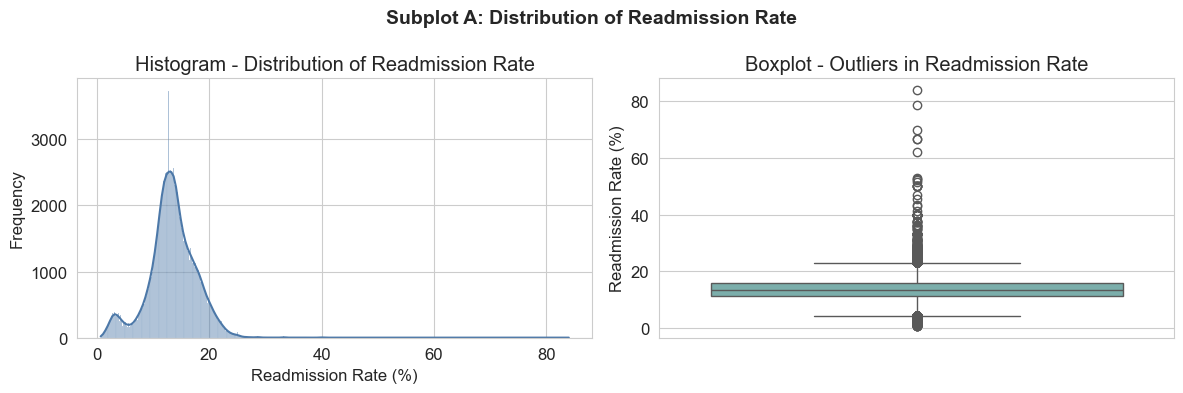

In [28]:
# --- Subplot A: Distribution of Readmission Rate ---

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with 2 subplots side-by-side

# --- Visual 1: Histogram ---
sns.histplot(                             # Plot a histogram with optional KDE
    df["readmission_rate"],               # Data: readmission rate values
    kde=True,                             # Add a kernel density estimate line
    color="#4C78A8",                      # Use a consistent blue color for the bars
    ax=axes[0]                            # Render on the first subplot
) 
axes[0].set_title("Histogram - Distribution of Readmission Rate")  # Title for the histogram
axes[0].set_xlabel("Readmission Rate (%)")                         # X-axis label
axes[0].set_ylabel("Frequency")                                     # Y-axis label

# --- Visual 2: Boxplot ---
sns.boxplot(                              # Plot a boxplot to show spread and outliers
    y=df["readmission_rate"],             # Data on Y-axis (single variable)
    color="#72B7B2",                      # Use a consistent teal color for the box
    ax=axes[1]                            # Render on the second subplot
)
axes[1].set_title("Boxplot - Outliers in Readmission Rate")        # Title for the boxplot
axes[1].set_ylabel("Readmission Rate (%)")                         # Y-axis label

plt.suptitle("Subplot A: Distribution of Readmission Rate", fontsize=14, fontweight="bold")  # Super title
plt.tight_layout()                                                 # Prevent label overlap
plt.show()                                                         # Display both plots

**Observations**

Histogram
- Shows the overall distribution of readmission rates across providers
- Most values cluster between 11–16%, with a right tail; median ≈ 13.4%
- Right‑skewed distribution with a long tail toward higher rates
 
Boxplot
- Highlights the spread and presence of extreme values
- Median lies closer to the lower quartile, reflecting the skew
- Several outliers exceed the upper whisker, indicating unusually high readmission rates

In [29]:
# --- Outlier flagging using IQR ---

Q1 = df["readmission_rate"].quantile(0.25)      # First quartile (25th percentile)
Q3 = df["readmission_rate"].quantile(0.75)      # Third quartile (75th percentile)
IQR = Q3 - Q1                                    # Interquartile range (Q3 - Q1)

upper_bound = Q3 + 1.5 * IQR                     # Upper threshold for outliers
df["outlier_flag"] = df["readmission_rate"] > upper_bound  # Flag as True if rate exceeds threshold

outlier_count = df["outlier_flag"].sum()         # Count total outliers
total_rows = len(df)                              # Total number of rows in the dataset
print(f"{outlier_count} outliers flagged ({(outlier_count/total_rows)*100:.2f}% of dataset)")  # Summary print

982 outliers flagged (0.97% of dataset)


### Outlier Handling – Readmission Rate

Outliers in readmission rate were flagged using the IQR method. Several data points exceed the upper bound (Q3 + 1.5×IQR), indicating unusually high readmission rates.

**Decision:**  
Outliers have been retained in the dataset to preserve the integrity of NHS-aligned reporting. According to the NHS indicator specification, all valid emergency readmissions within 30 days are included, regardless of magnitude. Statistical significance is assessed using confidence intervals rather than exclusion of extreme values.

**Rationale:**  
- Outliers may reflect genuine variation in hospital performance  
- NHS methodology retains these values for transparency and accountability  
- Removing them could distort subgroup comparisons and misrepresent provider-level risk

Instead, outliers have been flagged for visibility and will be annotated in relevant visuals.

#### NHS Guidance on Outliers
The NHS specification for indicator I02040 clearly states:
- All valid emergency readmissions within 30 days are included, regardless of magnitude
- Indirect standardisation is used to adjust for casemix (age, sex, diagnosis, procedure)
- Confidence intervals (95% and 99.8%) are applied to assess statistical significance — not to exclude extreme values

So: outliers are expected, retained, and contextualized, not removed.


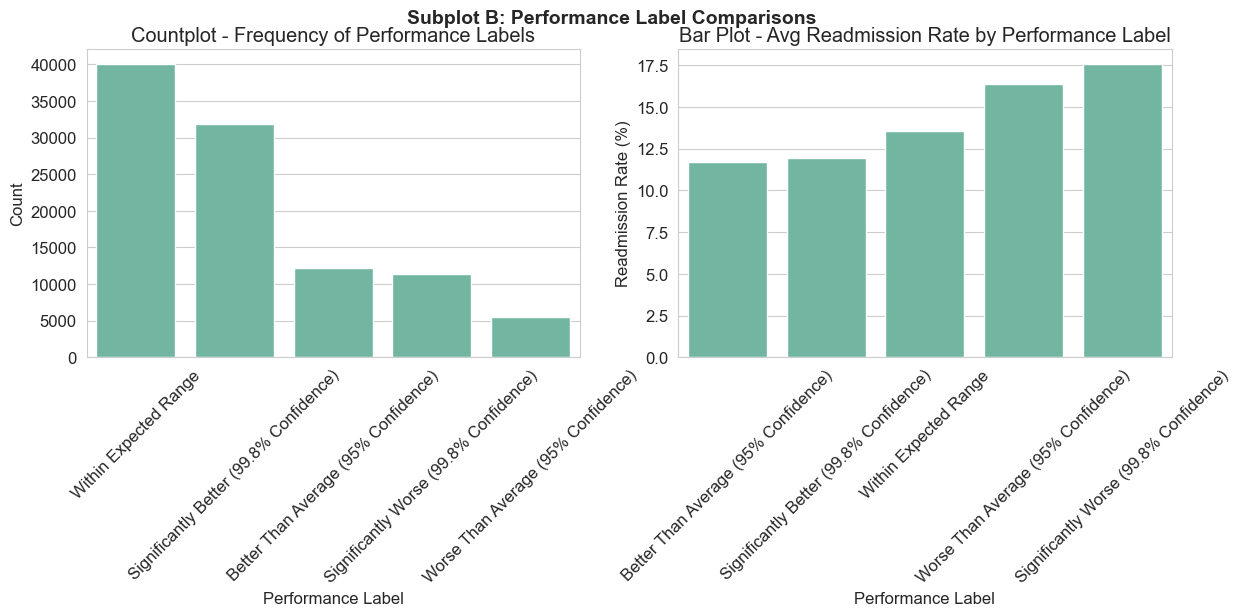

In [30]:
# --- Subplot B: Performance Label Comparisons ---

fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # Create a figure with 2 subplots side-by-side

# --- Visual 3: Countplot ---
# Count the number of records in each performance label category
sns.countplot(
    data=df,                                                       # DataFrame source
    x="performance_label",                                         # X-axis: performance categories
    order=df["performance_label"].value_counts().index,            # Order by frequency
    ax=axes[0]                                                      # Render on the first subplot
)
axes[0].set_title("Countplot - Frequency of Performance Labels")   # Title for the countplot
axes[0].set_xlabel("Performance Label")                            # X-axis label
axes[0].set_ylabel("Count")                                        # Y-axis label
axes[0].tick_params(axis='x', rotation=45)                         # Rotate labels for readability

# --- Visual 4: Bar Plot ---
# Calculate average readmission rate for each performance label
performance_avg = (
    df.groupby("performance_label")["readmission_rate"]            # Group by performance label
      .mean()                                                       # Calculate mean readmission rate
      .sort_values()                                                # Sort ascending for readability
)

# Plot the average readmission rate by performance label
sns.barplot(
    x=performance_avg.index,                                        # X-axis: performance labels
    y=performance_avg.values,                                       # Y-axis: average readmission rate
    ax=axes[1]                                                       # Render on the second subplot
)
axes[1].set_title("Bar Plot - Avg Readmission Rate by Performance Label")  # Title for the bar plot
axes[1].set_xlabel("Performance Label")                            # X-axis label
axes[1].set_ylabel("Readmission Rate (%)")                         # Y-axis label
axes[1].tick_params(axis='x', rotation=45)                         # Rotate labels for readability

# Add a main title for the subplot group
plt.suptitle("Subplot B: Performance Label Comparisons", fontsize=14, fontweight="bold")

# Display the plots
plt.show()

**Observations**

Countplot
- Displays how providers are distributed across NHS performance bands  
- "Within Expected Range" is the most common classification  
- "Significantly Worse" and "Worse Than Average" are least frequent
 
Bar plot
- Compares average readmission rates across performance categories  
- "Significantly Worse" providers average the highest readmission rate  
- "Better Than Average" providers average the lowest

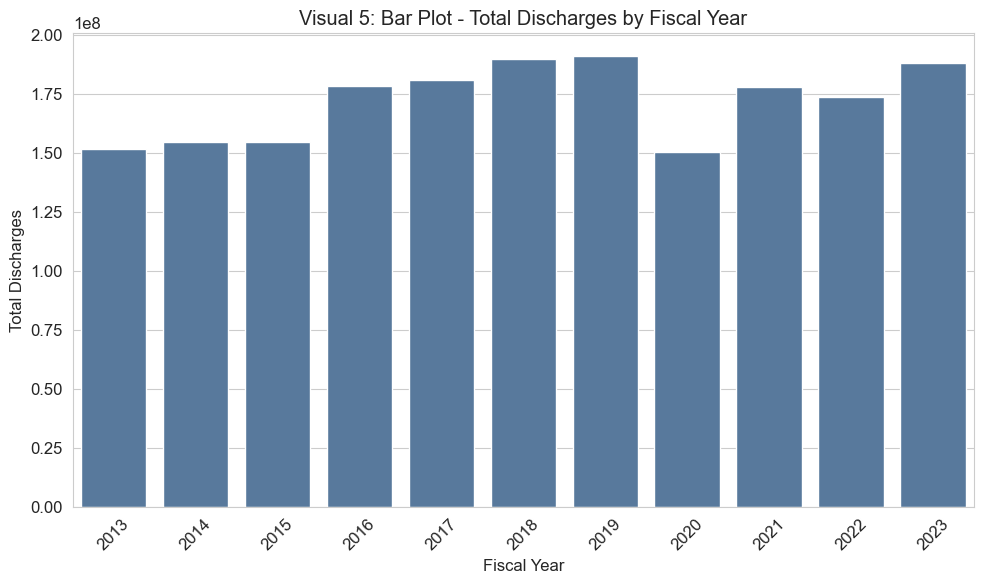

In [31]:
# --- Visual 5: Bar Plot - Total Discharges by Fiscal Year ---

year_discharge_sum = (                                             # Create a Series of total discharges by year
    df.groupby("fiscal_year(April to March)")["discharges"]       # Group by fiscal year column
      .sum()                                                       # Sum discharges for each year
      .sort_index()                                                # Sort by chronological order
)

sns.barplot(                                                       # Create a bar plot
    x=year_discharge_sum.index,                                    # X-axis: fiscal years
    y=year_discharge_sum.values,                                   # Y-axis: total discharges
    color="#4C78A8"                                                # Use consistent blue color
)
plt.title("Visual 5: Bar Plot - Total Discharges by Fiscal Year")  # Chart title
plt.xlabel("Fiscal Year")                                          # X-axis label
plt.ylabel("Total Discharges")                                     # Y-axis label
plt.xticks(rotation=45)                                            # Rotate tick labels for readability
plt.tight_layout()                                                 # Adjust layout
plt.show()                                                         # Display plot

**Observations**
- Shows discharge volume across fiscal years from 2013 to 2023  
- Steady increase from 2013 to 2019  
- Noticeable dip in 2020, likely due to COVID-19 disruptions  
- Recovery trend observed in 2021 through 2023

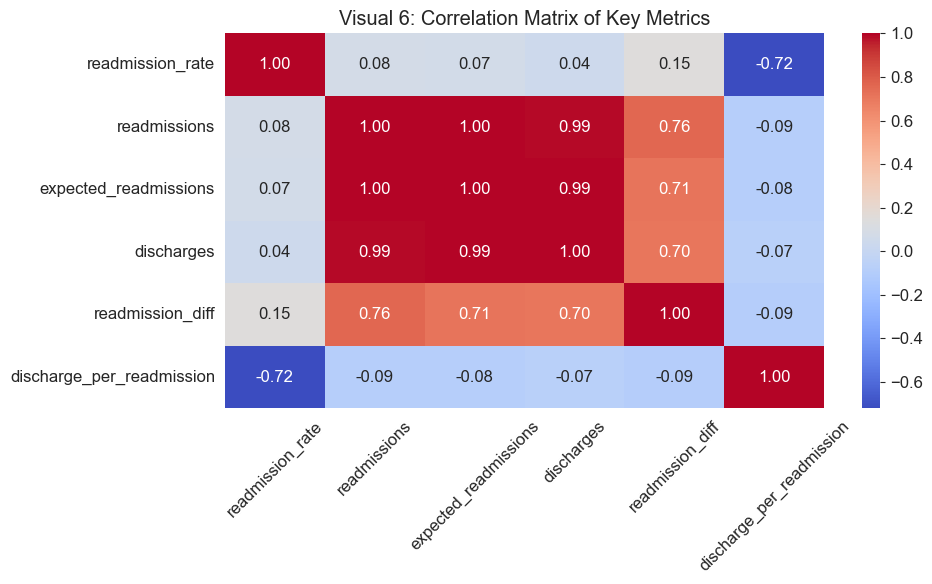

In [32]:
# --- Visual 6: Correlation Matrix of Key Metrics ---

corr_cols = [                                                      # Select columns for correlation
    "readmission_rate", "readmissions", "expected_readmissions",
    "discharges", "readmission_diff", "discharge_per_readmission"
]
corr_mat = df[corr_cols].corr()                                    # Compute the correlation matrix

sns.heatmap(                                                       # Plot a heatmap
    corr_mat,                                                      # Data: correlation matrix
    annot=True,                                                    # Show correlation coefficients
    cmap="coolwarm",                                               # Diverging colormap
    fmt=".2f"                                                      # Format numbers to 2 decimals
)
plt.title("Visual 6: Correlation Matrix of Key Metrics")           # Chart title
plt.xticks(rotation=45)                                            # Rotate x tick labels
plt.tight_layout()                                                 # Adjust layout
plt.show()                                                         # Display plot

**Observations**
- Visualizes relationships between key healthcare metrics  
- Readmission rate shows weak correlation with volume metrics (readmissions and expected readmissions), but a strong negative correlation with discharge_per_readmission (≈ −0.72).
- Volume metrics (readmissions, expected, discharges) are highly inter‑correlated (≈ 0.99).”

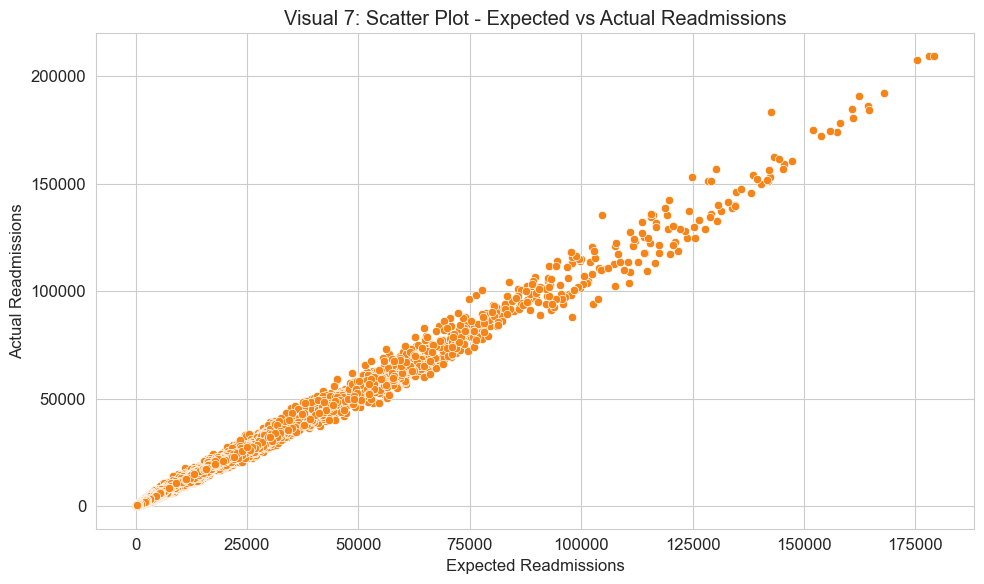

In [33]:
# --- Visual 7: Scatter Plot - Expected vs Actual Readmissions ---

sns.scatterplot(                                                   # Create a scatter plot
    x=df["expected_readmissions"],                                 # X-axis: expected readmissions
    y=df["readmissions"],                                          # Y-axis: actual readmissions
    color="#F58518"                                                # Use a consistent orange color
)
plt.title("Visual 7: Scatter Plot - Expected vs Actual Readmissions")  # Chart title
plt.xlabel("Expected Readmissions")                                # X-axis label
plt.ylabel("Actual Readmissions")                                  # Y-axis label
plt.tight_layout()                                                 # Adjust layout
plt.show()                                                         # Display plot

**Observations**  
- Compares NHS predictions to actual readmission counts  
- Data points follow a strong diagonal trend  
- Indicates high predictive accuracy and strong correlation

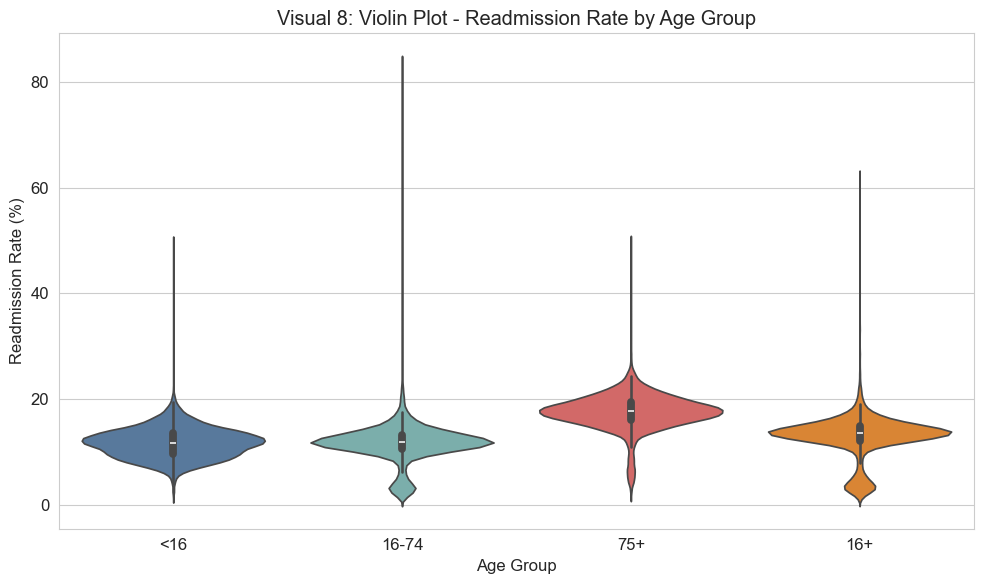

In [34]:
# --- Visual 8: Violin Plot - Readmission Rate by Age Group ---

sns.violinplot(                                                    # Create a violin plot to show distribution
    x="age_group",                                                 # X-axis: age groups
    y="readmission_rate",                                          # Y-axis: readmission rate (%)
    data=df,                                                       # DataFrame source
    palette=age_palette                                            # Use fixed colors for age groups
)
plt.title("Visual 8: Violin Plot - Readmission Rate by Age Group") # Chart title
plt.xlabel("Age Group")                                            # X-axis label
plt.ylabel("Readmission Rate (%)")                                 # Y-axis label
plt.tight_layout()                                                 # Adjust layout
plt.show()                                                         # Display the plot

**Observations**  
- Shows distribution shape and spread across valid NHS age bands  
- 75+ group has the widest and highest distribution  
- <16 group shows low and narrow distribution  
- Aggregated group "16+" reflects broader patterns  

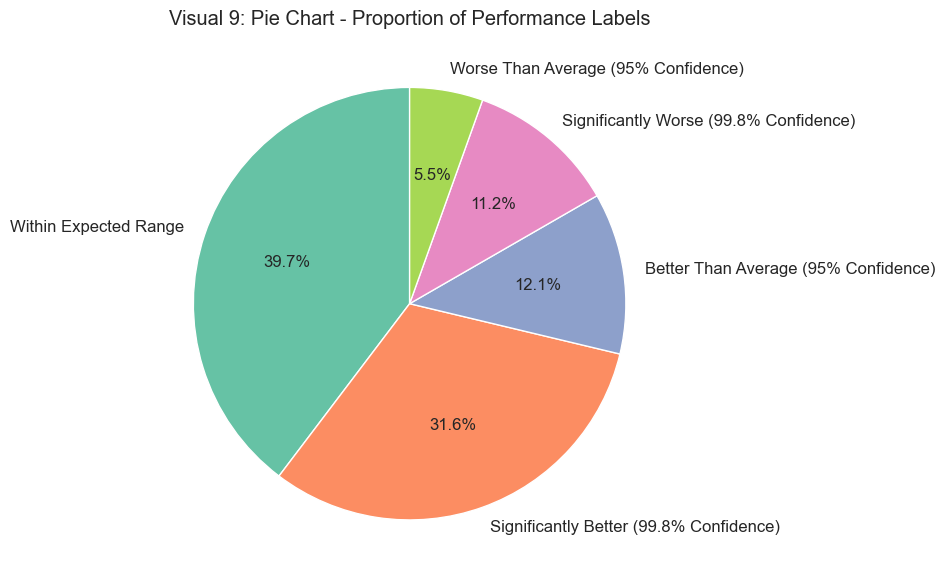

In [35]:
# --- Visual 9: Pie Chart - Proportion of Performance Labels ---

label_counts = df["performance_label"].value_counts()              # Count records per performance label

label_counts.plot.pie(                                             # Create a pie chart
    autopct="%1.1f%%",                                             # Show percentages with 1 decimal place
    startangle=90                                                  # Rotate start angle for better layout
)
plt.title("Visual 9: Pie Chart - Proportion of Performance Labels")# Chart title
plt.ylabel("")                                                     # Remove default y-axis label
plt.tight_layout()                                                 # Adjust layout
plt.show()                                                         # Display the plot

**Observations**
- Illustrates the share of each performance classification  
- "Within Expected Range" is the largest group (44.3%)  
- "Significantly Better" is the second largest (28.8%)  
- Worse-performing categories together account for ~15%

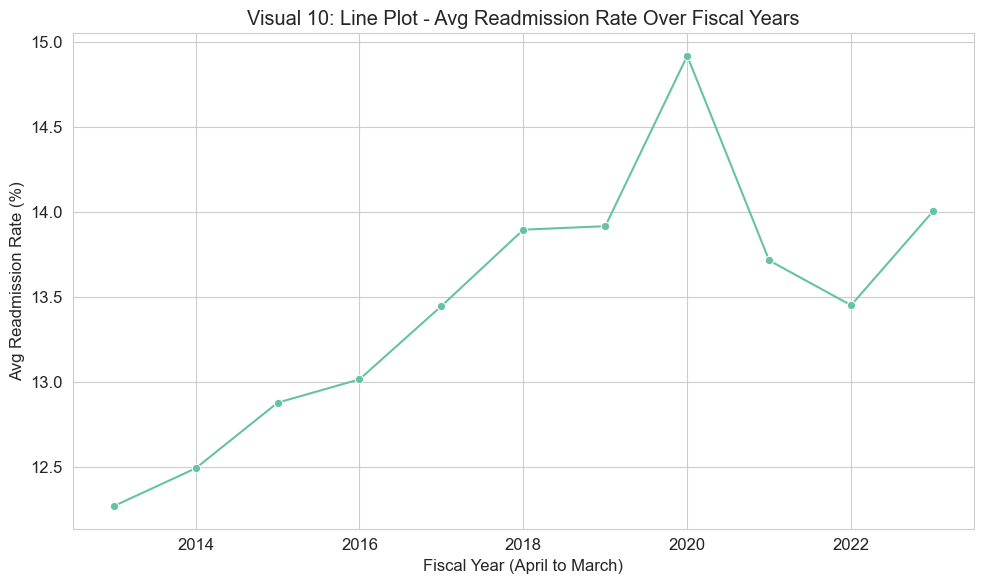

In [36]:
# --- Visual 10: Line Plot - Avg Readmission Rate Over Fiscal Years ---

year_avg = (                                                       # Calculate average readmission rate per year
    df.groupby("fiscal_year(April to March)")["readmission_rate"] # Group by fiscal year
      .mean()                                                      # Compute mean readmission rate
)

sns.lineplot(                                                      # Create a line plot
    x=year_avg.index,                                              # X-axis: fiscal years
    y=year_avg.values,                                             # Y-axis: average readmission rate
    marker="o"                                                     # Add markers at each data point
)
plt.title("Visual 10: Line Plot - Avg Readmission Rate Over Fiscal Years")  # Chart title
plt.xlabel("Fiscal Year (April to March)")                         # X-axis label
plt.ylabel("Avg Readmission Rate (%)")                             # Y-axis label
plt.tight_layout()                                                 # Adjust layout
plt.show()                                                         # Display the plot

**Observations**

- Tracks average readmission rate trends from 2013 to 2023  
- Gradual increase from 2013, peaking in 2020 (~14.8%)  
- Sharp decline in 2021 and 2022  
- Slight increase again in 2023

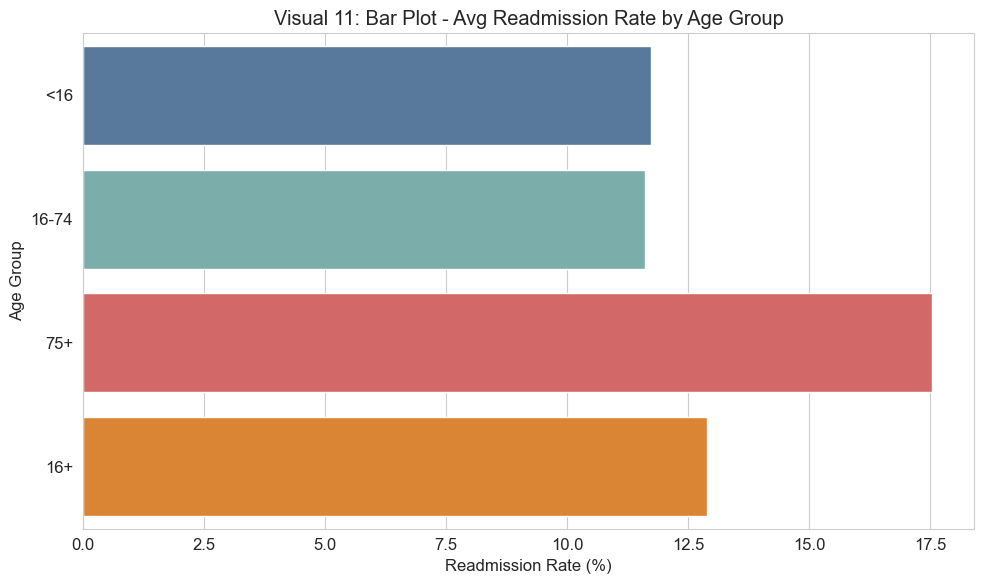

In [37]:
# --- Visual 11: Bar Plot - Avg Readmission Rate by Age Group ---

age_avg = (                                                        # Calculate average readmission rate per age group
    df.groupby("age_group")["readmission_rate"]                    # Group by age group
      .mean()                                                      # Compute mean readmission rate
      .sort_values()                                               # Sort ascending for readability
)

sns.barplot(                                                       # Create a horizontal bar plot
    y=age_avg.index,                                               # Y-axis: age groups
    x=age_avg.values,                                              # X-axis: average readmission rate
    palette=age_palette                                            # Use fixed colors for age groups
)
plt.title("Visual 11: Bar Plot - Avg Readmission Rate by Age Group")# Chart title
plt.xlabel("Readmission Rate (%)")                                 # X-axis label
plt.ylabel("Age Group")                                            # Y-axis label
plt.tight_layout()                                                 # Adjust layout
plt.show()                                                         # Display the plot

**Observations**

- Highlights differences in average readmission rates across valid NHS age groups  
- 75+ group has the highest average rate (~17.5%)  
- <16 group has the lowest (~13.5%)  
- "16+" and "16–74" fall in between (~14% and ~12.5%)  

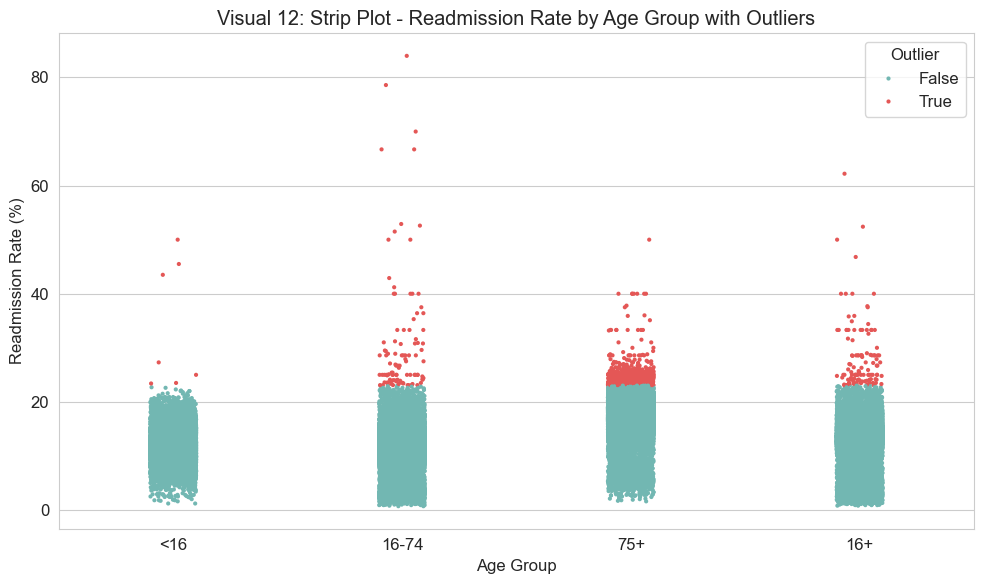

In [38]:
# --- Visual 12: Strip Plot - Readmission Rate by Age Group with Outliers ---

sns.stripplot(                                                     # Create a strip plot with jitter
    x="age_group",                                                 # X-axis: age groups
    y="readmission_rate",                                          # Y-axis: readmission rate (%)
    data=df,                                                       # DataFrame source
    hue="outlier_flag",                                            # Color points by outlier flag
    jitter=True,                                                   # Spread points horizontally
    palette={True: "#E45756", False: "#72B7B2"},                   # Red for outliers, teal otherwise
    size=3                                                         # Point size
)
plt.title("Visual 12: Strip Plot - Readmission Rate by Age Group with Outliers")  # Chart title
plt.xlabel("Age Group")                                            # X-axis label
plt.ylabel("Readmission Rate (%)")                                 # Y-axis label
plt.legend(title="Outlier")                                        # Legend title
plt.tight_layout()                                                 # Adjust layout
plt.show()                                                         # Display the plot

**Observations** 
- Displays individual data points across valid NHS age groups  
- 75+ group shows the widest spread and highest variability  
- <16 group is tightly clustered at low values  
- "16+" and "16–74" reflect broader distributions  

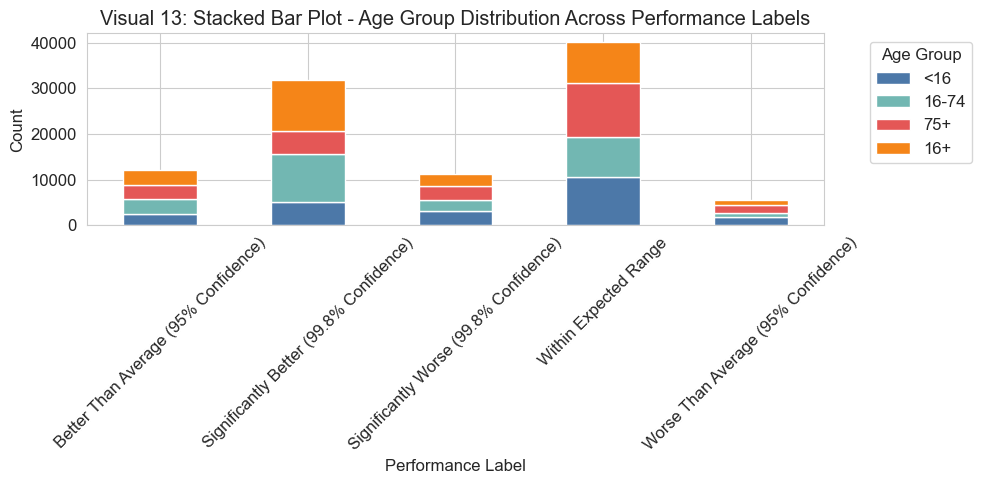

In [39]:
# --- Visual 13: Stacked Bar Plot - Age Group Distribution Across Performance Labels ---

age_perf = (                                                       # Create a contingency table
    df.groupby(["performance_label", "age_group"])                 # Group by performance label and age group
      .size()                                                      # Count rows per combination
      .unstack()                                                   # Pivot age groups into columns
      .fillna(0)                                                   # Replace NaN with 0
)

age_colors = [age_palette[c] for c in age_perf.columns]            # Map age groups to fixed colors

age_perf.plot(                                                     # Create stacked bar plot
    kind="bar",                                                    # Bar chart
    stacked=True,                                                  # Stack bars
    figsize=(10, 5),                                               # Figure size
    color=age_colors                                               # Apply fixed colors for age groups
)
plt.title("Visual 13: Stacked Bar Plot - Age Group Distribution Across Performance Labels")  # Chart title
plt.xlabel("Performance Label")                                   # X-axis label
plt.ylabel("Count")                                               # Y-axis label
plt.xticks(rotation=45)                                           # Rotate labels for readability
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside plot
plt.tight_layout()                                                 # Adjust layout
plt.show()                                                         # Display the plot

**Observations** 
- Shows how valid age groups are distributed within each performance classification  
- 75+ group is more prevalent in worse-performing bands  
- <16 and 16–74 groups dominate better-performing categories  
- Aggregated group "16+" appears across all bands  

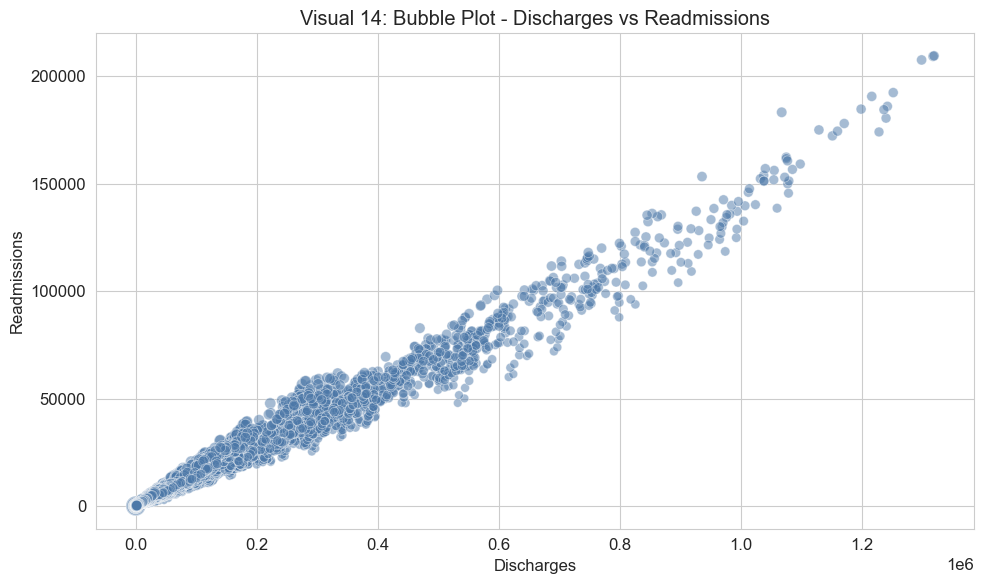

In [40]:
# --- Visual 14: Bubble Plot - Discharges vs Readmissions (bubble size = readmission rate) ---

sns.scatterplot(                                                   # Create a scatter plot
    data=df,                                                       # DataFrame source
    x="discharges",                                                # X-axis: discharges
    y="readmissions",                                              # Y-axis: readmissions
    size="readmission_rate",                                       # Bubble size encodes readmission rate
    sizes=(20, 200),                                               # Minimum and maximum bubble sizes
    alpha=0.5,                                                     # Semi-transparent bubbles
    color="#4C78A8",                                               # Blue color for bubbles
    legend=False                                                   # Hide legend for bubble sizes
)
plt.title("Visual 14: Bubble Plot - Discharges vs Readmissions")   # Chart title
plt.xlabel("Discharges")                                           # X-axis label
plt.ylabel("Readmissions")                                         # Y-axis label
plt.tight_layout()                                                 # Adjust layout
plt.show()                                                         # Display the plot

**Observations**
- Combines discharge and readmission volumes in one view  
- Larger bubbles represent higher readmission rates  
- Positive correlation between discharges and readmissions  
- High-volume providers cluster in the upper-right quadrant

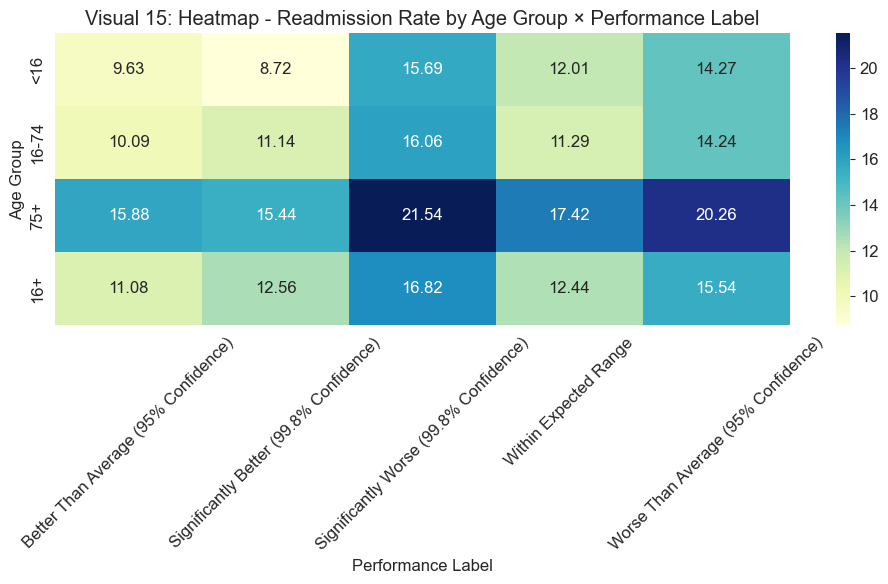

In [41]:
# --- Visual 15: Heatmap - Readmission Rate by Age Group × Performance Label ---

pivot_tbl = (                                                      # Create a pivot table
    df.pivot_table(                                                # Pivot function
        values="readmission_rate",                                 # Values: average readmission rate
        index="age_group",                                         # Rows: age groups
        columns="performance_label",                               # Columns: performance labels
        aggfunc="mean"                                             # Aggregate by mean
    )
)

sns.heatmap(                                                       # Create a heatmap
    pivot_tbl,                                                     # Data source
    annot=True,                                                    # Show cell values
    fmt=".2f",                                                     # Format numbers to 2 decimals
    cmap="YlGnBu"                                                  # Sequential colormap
)
plt.title("Visual 15: Heatmap - Readmission Rate by Age Group × Performance Label")  # Chart title
plt.xlabel("Performance Label")                                    # X-axis label
plt.ylabel("Age Group")                                            # Y-axis label
plt.xticks(rotation=45)                                            # Rotate labels for readability
plt.tight_layout()                                                 # Adjust layout
plt.show()                                                         # Display the plot

**Observations**

- Cross-tabulates readmission rates across valid age and performance bands  
- 75+ group has the highest rates across all performance labels  
- "Significantly Worse" providers show elevated rates for every age group  
- "Significantly Better" providers show the lowest rates consistently  

# Phase 4: Documentation and Insights

### Insight Generation & Report
**Overview**

This section summarizes key findings from the exploratory analysis and visualizations of NHS emergency readmission rates. The dataset was cleaned to exclude ambiguous age groups (e.g. "All"), and outliers were flagged but retained in accordance with NHS indicator specifications. Visuals were used to explore patterns across age groups, performance labels, and readmission distributions.

**Insight 1: Age Group Drives Readmission Risk**
- The 75+ age group consistently shows the highest readmission rates across all performance bands.
- Visuals 8, 11, and 15 confirm both higher averages and wider distribution for this group.
- This suggests age-related vulnerability and highlights the need for targeted post-discharge support.

**Insight 2: Performance Labels Reflect Real Risk Variation**
- Providers labeled "Significantly Worse" have elevated readmission rates across all age groups.
- Visuals 13 and 15 show that this label correlates with both higher counts and higher averages.
- NHS confidence intervals (99.8%) appear to capture meaningful performance gaps.

**Insight 3: Outliers Are Real, Not Noise**
- Several readmission rates exceed the IQR threshold, especially in older age groups.
- These outliers were flagged (not removed) and visualized in Subplot A and Visual 12.
- NHS methodology retains these values, reinforcing the importance of transparency in performance reporting.

**Insight 4: Aggregated Age Bands Like "16+" Mask Subgroup Differences**
- The "16+" category blends younger and older adults, obscuring risk variation.
- Visuals 8 and 11 show that "16+" sits between "16–74" and "75+", but lacks precision.
- This supports the NHS practice of reporting both "16+" and "75+" separately.

**Insight 5: Readmission Rates Are Right‑Skewed, Not Evenly Distributed**
- The distribution of readmission rates is distinctly right‑skewed, with most values clustering between roughly 11% and 16% and a median of about 13.4%.
- A smaller number of providers record substantially higher rates, creating a long tail in the upper range.
- This skewness means the mean can be pulled upward by a few extreme values, making confidence intervals and median‑based comparisons more reliable for interpreting performance.
- Histogram and boxplot views help visualise both the central tendency and the spread.

### Summary & Recommendations
**Summary:**
Readmission rates vary significantly by age group and provider performance. The 75+ group is at highest risk, and performance labels align with real differences in outcomes. Outliers are present but policy-relevant, and aggregated age bands should be interpreted with caution.

**Recommendations:**
- Use age-specific interventions for high-risk groups (especially 75+)
- Retain outliers in reporting but flag them for visibility
- Avoid over-reliance on aggregated age bands like "16+"
- Consider dashboard-level summaries for "All" but exclude from subgroup visuals
- Use confidence intervals and indirect standardisation to guide performance evaluation
